In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.index.freq = 'MS'

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [82]:
train_data = df.iloc[:108]
test_data = df.iloc[108:]

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [86]:
fitted_model= ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal ='mul',
                                   seasonal_periods=12).fit()

C:\Users\PC\anaconda333\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [88]:
test_predictions = fitted_model.forecast(36)

In [90]:
test_predictions

1958-01-01    356.968610
1958-02-01    344.588814
1958-03-01    405.718372
1958-04-01    400.610890
1958-05-01    409.001733
1958-06-01    480.694242
1958-07-01    530.470108
1958-08-01    523.288565
1958-09-01    454.210607
1958-10-01    392.518149
1958-11-01    345.928427
1958-12-01    396.605195
1959-01-01    408.958921
1959-02-01    394.776083
1959-03-01    464.808791
1959-04-01    458.957435
1959-05-01    468.570354
1959-06-01    550.704442
1959-07-01    607.729860
1959-08-01    599.502369
1959-09-01    520.363626
1959-10-01    449.686036
1959-11-01    396.310803
1959-12-01    454.368335
1960-01-01    468.521307
1960-02-01    452.272824
1960-03-01    532.505370
1960-04-01    525.801800
1960-05-01    536.814783
1960-06-01    630.911202
1960-07-01    696.242027
1960-08-01    686.816251
1960-09-01    596.151430
1960-10-01    515.180078
1960-11-01    454.031066
1960-12-01    520.544326
Freq: MS, dtype: float64

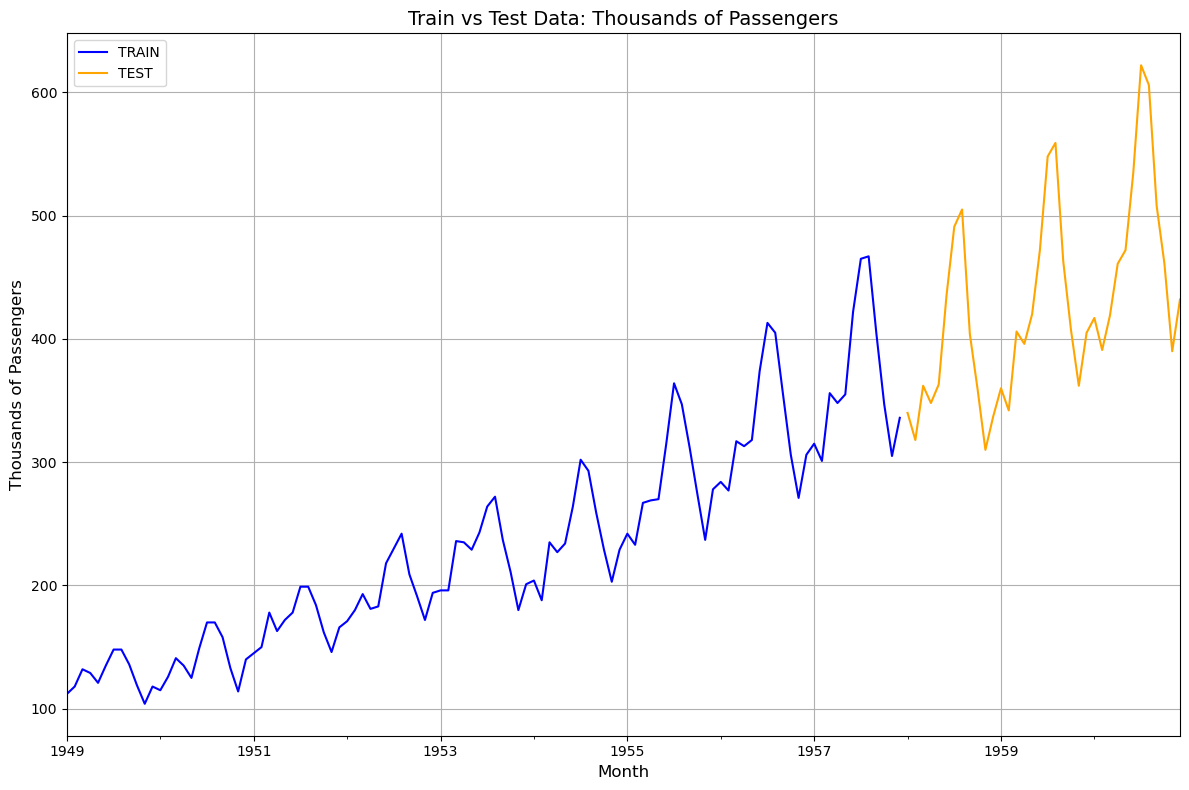

In [92]:
import matplotlib.pyplot as plt

# Grafik çizimi
plt.figure(figsize=(12, 8))
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', color='blue')
test_data['Thousands of Passengers'].plot(legend=True, label='TEST', color='orange')

# Grafik başlık ve etiketlerini ayarlama
plt.title('Train vs Test Data: Thousands of Passengers', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Thousands of Passengers', fontsize=12)

# Grafik gösterme
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


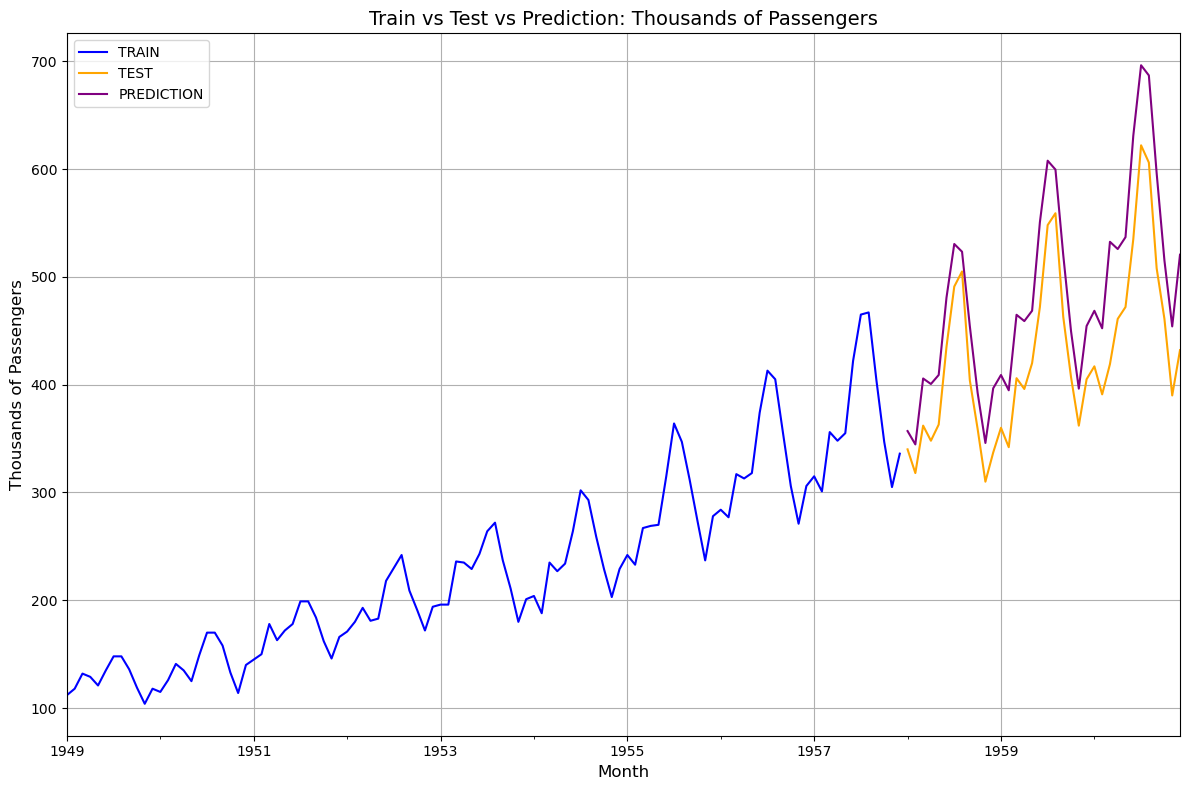

In [94]:
import matplotlib.pyplot as plt

# Grafik çizimi
plt.figure(figsize=(12, 8))

# TRAIN verisi
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', color='blue')

# TEST verisi
test_data['Thousands of Passengers'].plot(legend=True, label='TEST', color='orange')

# PREDICTION verisi
test_predictions.plot(legend=True, label='PREDICTION', color='purple')

# Grafik başlık ve etiketlerini ayarlama
plt.title('Train vs Test vs Prediction: Thousands of Passengers', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Thousands of Passengers', fontsize=12)

# Grafik gösterme
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


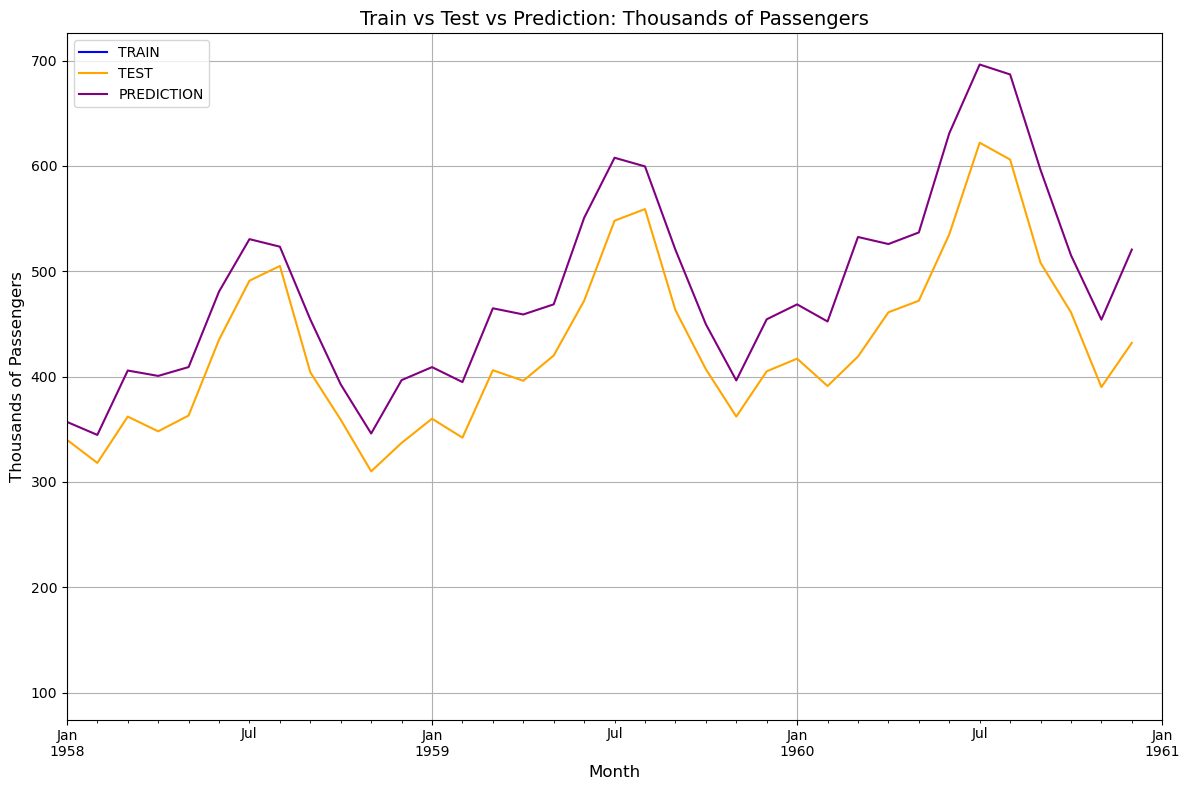

In [95]:
import matplotlib.pyplot as plt

# Grafik çizimi
plt.figure(figsize=(12, 8))

# TRAIN verisi
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', color='blue')

# TEST verisi
test_data['Thousands of Passengers'].plot(legend=True, label='TEST', color='orange')

# PREDICTION verisi
test_predictions.plot(legend=True, label='PREDICTION', color='purple',xlim = ['1958-01-01','1961-01-01'])

# Grafik başlık ve etiketlerini ayarlama
plt.title('Train vs Test vs Prediction: Thousands of Passengers', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Thousands of Passengers', fontsize=12)

# Grafik gösterme
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluation Metrics

In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [101]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [103]:
mean_absolute_error(test_data,test_predictions)

55.69814531314276

In [105]:
mean_squared_error(test_data,test_predictions)

3525.90947013639

In [107]:
np.sqrt(mean_squared_error(test_data,test_predictions))

59.37936906145425

In [112]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\PC\anaconda333\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [114]:
forecast_predictions =final_model.forecast(36)

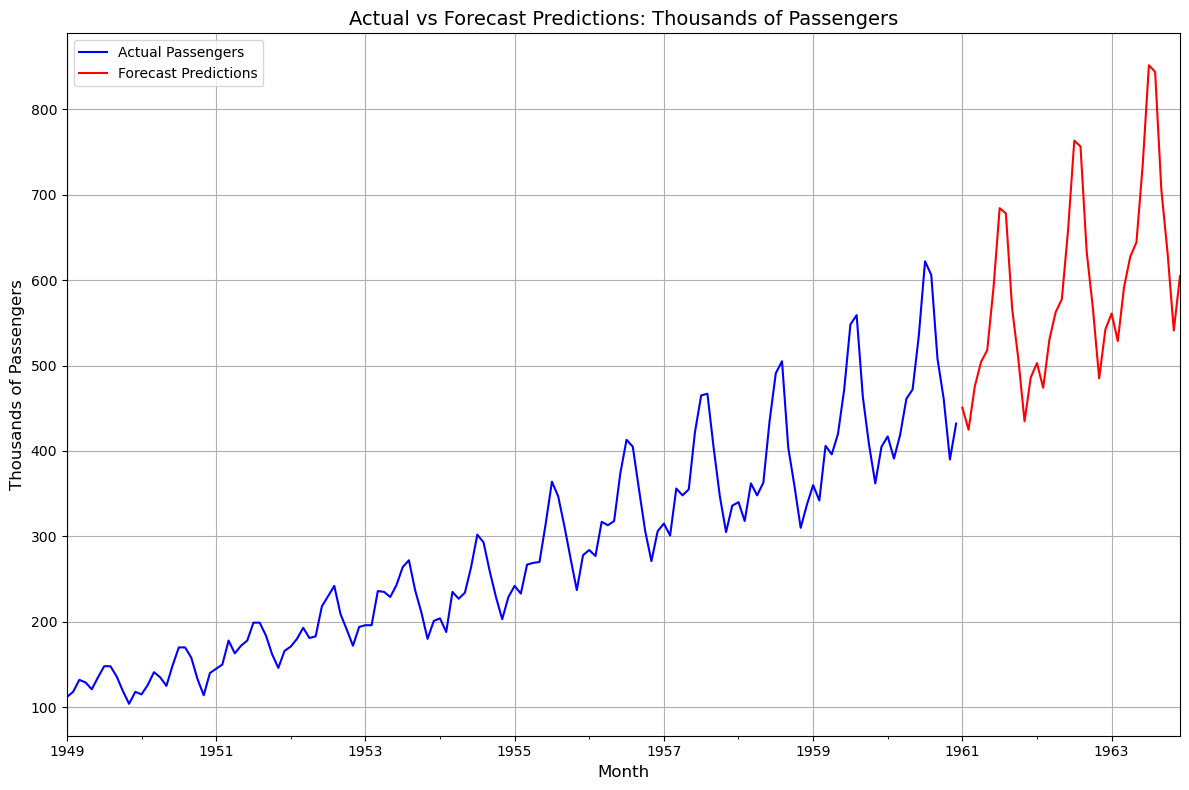

In [117]:
import matplotlib.pyplot as plt

# Grafik çizimi
plt.figure(figsize=(12, 8))

# Thousands of Passengers verisini çizme
df['Thousands of Passengers'].plot(legend=True, label='Actual Passengers', color='blue')

# Forecast predictions'ı çizme
forecast_predictions.plot(legend=True, label='Forecast Predictions', color='red')

# Grafik başlık ve etiketlerini ayarlama
plt.title('Actual vs Forecast Predictions: Thousands of Passengers', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Thousands of Passengers', fontsize=12)

# Grafik gösterme
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>
The file <tt>samples.csv</tt> contains made-up datasets that illustrate stationary and non-stationary data.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

In [120]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


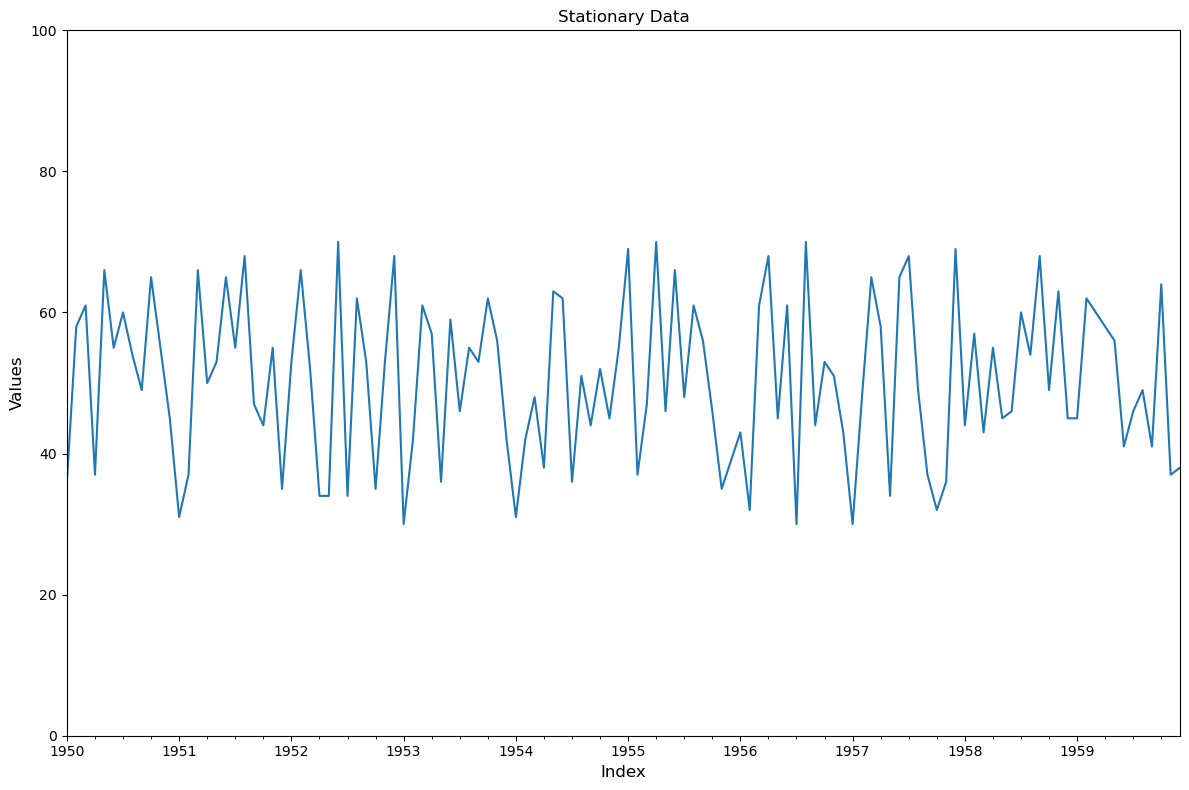

In [122]:
import matplotlib.pyplot as plt

# Grafik çizimi
df2['a'].plot(ylim=[0, 100], title="Stationary Data", figsize=(12, 8))

# X eksenini sıkıştırma
plt.gca().autoscale(axis='x', tight=True)

# Grafik başlık ve etiketlerini ayarlama
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Grafik gösterme
plt.tight_layout()
plt.show()


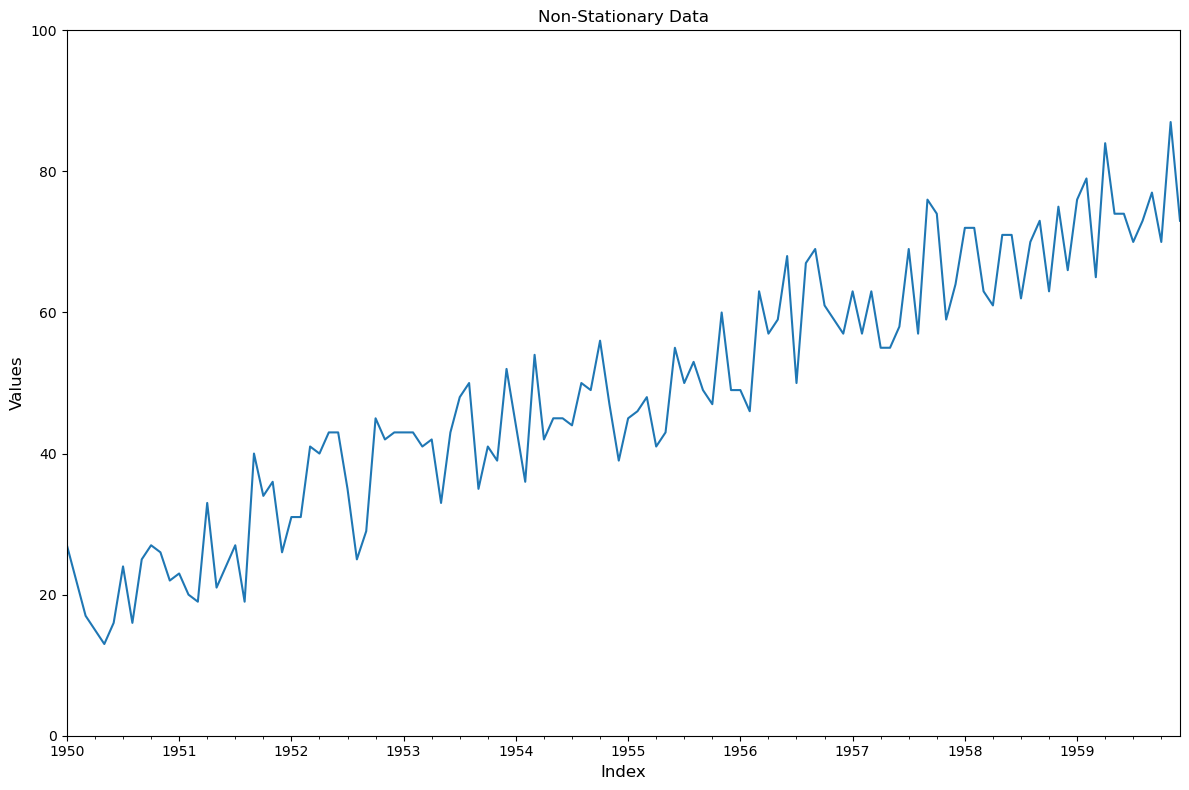

In [124]:
import matplotlib.pyplot as plt

# Grafik çizimi
df2['b'].plot(ylim=[0, 100], title="Non-Stationary Data", figsize=(12, 8))

# X eksenini sıkıştırma
plt.gca().autoscale(axis='x', tight=True)

# Grafik başlık ve etiketlerini ayarlama
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Grafik gösterme
plt.tight_layout()
plt.show()


# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


In [129]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['b'],k_diff=1)

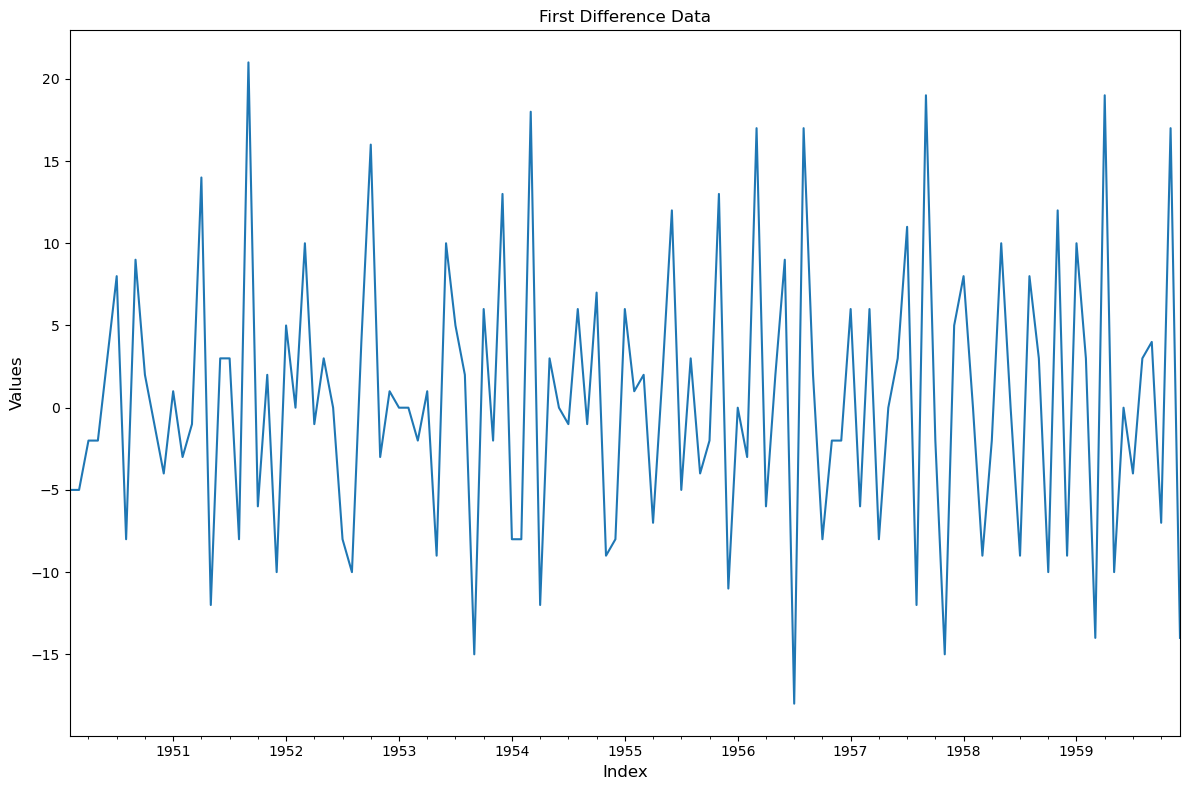

In [131]:
import matplotlib.pyplot as plt

# Grafik çizimi
df2['d1'].plot(title="First Difference Data", figsize=(12, 8))

# X eksenini sıkıştırma
plt.gca().autoscale(axis='x', tight=True)

# Grafik başlık ve etiketlerini ayarlama
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Grafik gösterme
plt.tight_layout()
plt.show()


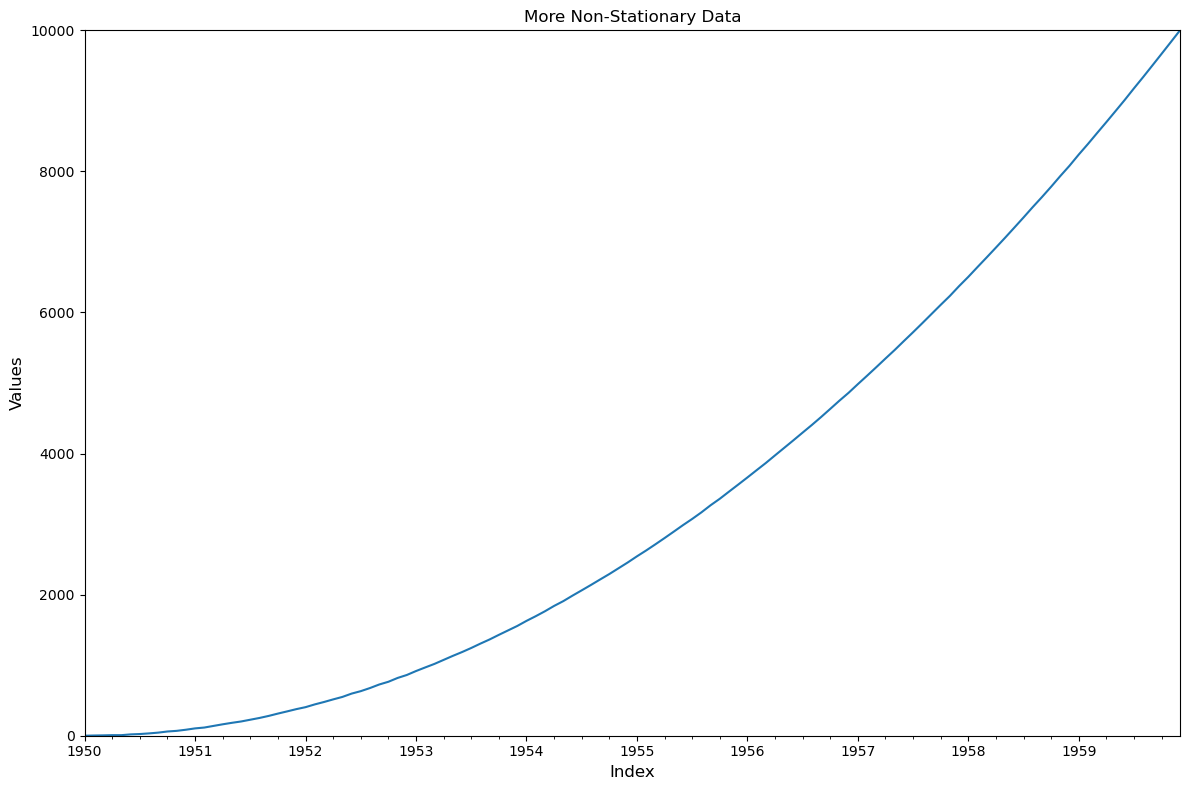

In [126]:
import matplotlib.pyplot as plt

# Grafik çizimi
df2['c'].plot(ylim=[0, 10000], title="More Non-Stationary Data", figsize=(12, 8))

# X eksenini sıkıştırma
plt.gca().autoscale(axis='x', tight=True)

# Grafik başlık ve etiketlerini ayarlama
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Grafik gösterme
plt.tight_layout()
plt.show()
